In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ibm_df = pd.read_csv('./IBM_data_processed.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)
ibm_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [3]:
# Create a new DataFrame with two columns: 'Column Name' and 'Description'
columns_info = [
    ("Age", "Tuổi của nhân viên."),
    ("Attrition", "Tình trạng nghỉ việc của nhân viên (Yes = Đã nghỉ việc, No = Chưa nghỉ việc)."),
    ("BusinessTravel", "Tần suất đi công tác của nhân viên: Travel_Rarely = Đi công tác hiếm khi, Travel_Frequently = Đi công tác thường xuyên, Non-Travel = Không đi công tác."),
    ("DailyRate", "Mức lương hàng ngày của nhân viên."),
    ("Department", "Bộ phận mà nhân viên đang làm việc (ví dụ: Sales, Research & Development)."),
    ("DistanceFromHome", "Khoảng cách giữa nơi làm việc và nhà của nhân viên (tính bằng số dặm)."),
    ("Education", "Mức độ học vấn của nhân viên, mã hóa bằng số (1 đến 5). Các giá trị thường liên quan đến các cấp độ học vấn như sau: 1: Chưa hoàn thành Cao đẳng, 2: Cao đẳng, 3: Cử nhân đại học, 4: Thạc sĩ, 5: Tiến sĩ."),
    ("EducationField", "Lĩnh vực học vấn của nhân viên, ví dụ: Life Sciences = Khoa học sự sống, Medical = Y tế, Other = Các lĩnh vực khác."),
    ("EmployeeCount", "Số lượng nhân viên trong công ty (thường là 1 cho mỗi nhân viên)."),
    ("EmployeeNumber", "Mã số nhận dạng của nhân viên trong hệ thống."),
    ("EnvironmentSatisfaction", "Mức độ hài lòng với môi trường làm việc (từ 1 đến 4, với 1 là Thấp và 4 là rất cao)."),
    ("Gender", "Giới tính của nhân viên (Male = Nam, Female = Nữ)."),
    ("HourlyRate", "Mức lương theo giờ của nhân viên."),
    ("JobInvolvement", "Mức độ tham gia và cống hiến trong công việc của nhân viên (từ 1 đến 4)."),
    ("JobLevel", "Mức độ công việc của nhân viên (1 đến 5, với 1 là mức thấp nhất)."),
    ("JobRole", "Vai trò công việc của nhân viên (ví dụ: Sales Executive, Research Scientist, etc.)."),
    ("JobSatisfaction", "Mức độ hài lòng với công việc của nhân viên (từ 1 đến 4)."),
    ("MaritalStatus", "Tình trạng hôn nhân của nhân viên (Single = Độc thân, Married = Đã kết hôn, Divorced = Ly hôn)."),
    ("MonthlyIncome", "Thu nhập hàng tháng của nhân viên."),
    ("MonthlyRate", "Mức lương hàng tháng."),
    ("NumCompaniesWorked", "Số công ty mà nhân viên đã từng làm việc trong sự nghiệp."),
    ("Over18", "Độ tuổi làm việc có lớn hơn 18 hay chưa(Y = Có, N = Không)."),
    ("OverTime", "Thực hiện làm việc ngoài giờ (Yes = Có, No = Không)."),
    ("PercentSalaryHike", "Tỷ lệ tăng lương của nhân viên (theo phần trăm)."),
    ("PerformanceRating", "Đánh giá hiệu suất công việc của nhân viên (1 đến 4, với 4 là hiệu suất cao nhất)."),
    ("RelationshipSatisfaction", "Mức độ hài lòng với các mối quan hệ tại nơi làm việc (từ 1 đến 4)."),
    ("StandardHours", "Số giờ làm việc chuẩn của nhân viên (thường là 80 giờ)."),
    ("StockOptionLevel", "Mức độ quyền chọn cổ phiếu của nhân viên (0 đến 3)."),
    ("TotalWorkingYears", "Tổng số năm làm việc của nhân viên từ khi bắt đầu sự nghiệp."),
    ("TrainingTimesLastYear", "Số lần tham gia đào tạo trong năm vừa qua."),
    ("WorkLifeBalance", "Mức độ cân bằng giữa công việc và cuộc sống của nhân viên (từ 1 đến 4)."),
    ("YearsAtCompany", "Số năm mà nhân viên đã làm việc tại công ty hiện tại."),
    ("YearsInCurrentRole", "Số năm nhân viên đã đảm nhận vai trò hiện tại."),
    ("YearsSinceLastPromotion", "Số năm kể từ lần thăng chức gần nhất của nhân viên."),
    ("YearsWithCurrManager", "Số năm làm việc dưới sự quản lý của người quản lý hiện tại.")
]

df_columns_info = pd.DataFrame(columns_info, columns=['Column Name', 'Description'])

df_columns_info

,Column Name,Description
0,Age,Tuổi của nhân viên.
1,Attrition,"Tình trạng nghỉ việc của nhân viên (Yes = Đã nghỉ việc, No = Chưa nghỉ việc)."
2,BusinessTravel,"Tần suất đi công tác của nhân viên: Travel_Rarely = Đi công tác hiếm khi, Travel_Frequently = Đi công tác thường xuyên, Non-Travel = Không đi công tác."
3,DailyRate,Mức lương hàng ngày của nhân viên.
4,Department,"Bộ phận mà nhân viên đang làm việc (ví dụ: Sales, Research & Development)."
5,DistanceFromHome,Khoảng cách giữa nơi làm việc và nhà của nhân viên (tính bằng số dặm).
6,Education,"Mức độ học vấn của nhân viên, mã hóa bằng số (1 đến 5). Các giá trị thường liên quan đến các cấp độ học vấn như sau: 1: Chưa hoàn thành Cao đẳng, 2: Cao đẳng, 3: Cử nhân đại học, 4: Thạc sĩ, 5: Tiến sĩ."
7,EducationField,"Lĩnh vực học vấn của nhân viên, ví dụ: Life Sciences = Khoa học sự sống, Medical = Y tế, Other = Các lĩnh vực khác."
8,EmployeeCount,Số lượng nhân viên trong công ty (thường là 1 cho mỗi nhân viên).
9,EmployeeNumber,Mã số nhận dạng của nhân viên trong hệ thống.


## Câu hỏi: Số lượng công ty trung bình mà từng thế hệ đã làm việc là bao nhiêu? Các thế hệ trước có thực sự gắn bó lâu dài hơn với một công ty so với thế hệ trẻ hay không?

Lợi ích khi đặt câu hỏi:
- Giúp hiểu được xu hướng làm việc của từng thế hệ, xác định liệu các thế hệ trước có xu hướng làm việc lâu dài tại một công ty so với thế hệ trẻ.
- Giúp tổ chức điều chỉnh chiến lược tuyển dụng và giữ chân nhân viên phù hợp với đặc điểm từng thế hệ.

Cách trả lời câu hỏi:
- Bước 1 - Tiền xử lý:
- Bước 2 - Vẽ biểu đồ:



## Câu hỏi: Môi trường làm việc ảnh hưởng như thế nào đến sự hài lòng và tỷ lệ nghỉ việc của nhân viên trong tổ chức?

### Mục đích của câu hỏi:
- Đánh giá các tác động của môi trường làm việc đến sự hài lòng và tỷ lệ nghỉ việc của nhân viên.
- Phân tích các yếu tố trong môi trường làm việc cần cải thiện để nâng cao hiệu quả công việc.

### Các bước phân tích:
- Trung bình thu nhập hàng tháng của từng vai trò công việc.
- Tỉ lệ nghỉ việc theo từng vai trò công việc.
- Tỉ lệ nghỉ việc theo mức độ hài lòng về các mối quan hệ tại nơi làm việc
- Mức độ hài lòng với môi trường làm việc theo từng vai trò công việc

## Câu hỏi: Mức thu nhập có thực sự là yếu tố quan trọng dẫn đến quyết định nghỉ việc không?

### Mục đích của câu hỏi:
- Giúp tổ chức hiểu rõ hơn về vai trò của thu nhập trong việc giữ chân nhân viên, từ đó cải thiện chính sách lương thưởng và điều kiện làm việc.
- Giúp tổ chức hiểu sâu hơn về các yếu tố ảnh hưởng đến sự gắn bó của nhân viên, từ đó xây dựng chiến lược nhân sự hiệu quả hơn.

### Các bước phân tích:


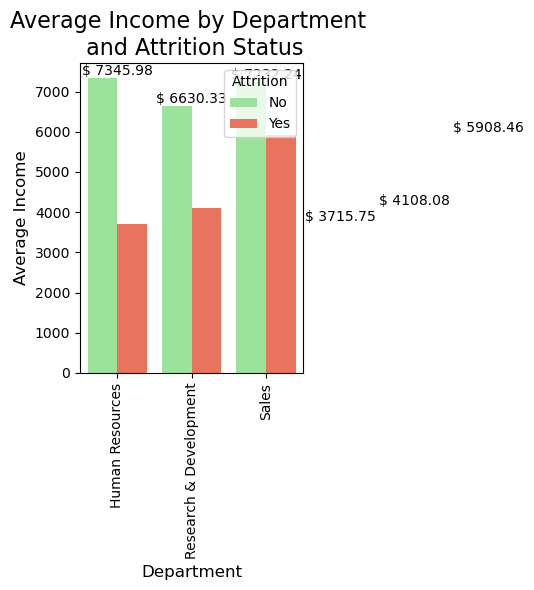

In [11]:
# Tính toán thu nhập trung bình theo phòng ban và trạng thái nghỉ việc
avg_income = (
    ibm_df.groupby(['Attrition', 'Department'])['MonthlyIncome']
    .mean()
    .reset_index()
    .rename(columns={'MonthlyIncome': 'avg_income'})
)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_income, 
    x='Department', 
    y='avg_income', 
    hue='Attrition', 
    palette=['lightgreen', 'tomato']
)

# Tùy chỉnh giao diện biểu đồ
plt.xticks(rotation=90)
plt.title('Average Income by Department \n and Attrition Status', fontsize=16, ha='center')
plt.ylabel('Average Income', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.legend(title='Attrition', loc='upper right')

# Hiển thị giá trị trên cột
for index, row in avg_income.iterrows():
    plt.text(
        index, 
        row['avg_income'], 
        f"$ {round(row['avg_income'], 2)}", 
        color='black', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

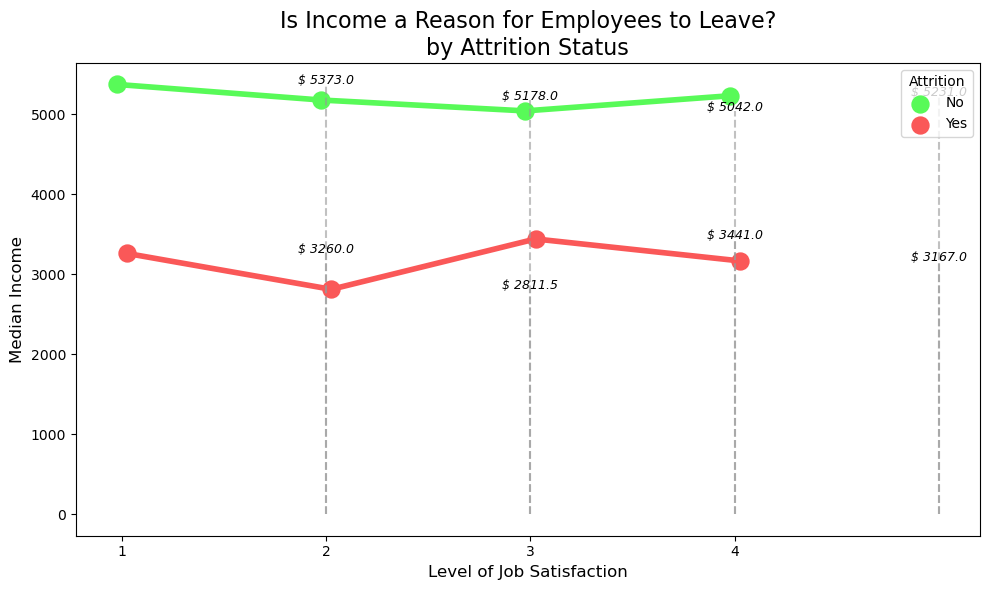

In [13]:
# Chuyển đổi cột JobSatisfaction thành dạng danh mục (categorical)
ibm_df['JobSatisfaction'] = ibm_df['JobSatisfaction'].astype('category')

# Tính toán thu nhập trung bình theo mức độ hài lòng công việc và trạng thái nghỉ việc
median_income = (
    ibm_df.groupby(['JobSatisfaction', 'Attrition'])['MonthlyIncome']
    .median()
    .reset_index()
    .rename(columns={'MonthlyIncome': 'med_income'})
)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.pointplot(
    data=median_income,
    x='JobSatisfaction',
    y='med_income',
    hue='Attrition',
    palette=["#58FA58", "#FA5858"],
    dodge=True,
    markers="o",
    scale=1.5
)

# Vẽ các đoạn kết nối
for i, row in median_income.iterrows():
    plt.plot(
        [row['JobSatisfaction'], row['JobSatisfaction']],
        [0, row['med_income']],
        color="#999999",
        linestyle='--',
        alpha=0.6
    )

# Tùy chỉnh giao diện biểu đồ
plt.title("Is Income a Reason for Employees to Leave?\nby Attrition Status", fontsize=16, ha='center')
plt.xlabel("Level of Job Satisfaction", fontsize=12)
plt.ylabel("Median Income", fontsize=12)
plt.legend(title="Attrition", loc='upper right')

# Hiển thị giá trị trên các điểm
for index, row in median_income.iterrows():
    plt.text(
        row['JobSatisfaction'],
        row['med_income'],
        f"$ {round(row['med_income'], 2)}",
        color='black',
        ha='center',
        fontsize=9,
        fontstyle='italic'
    )

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

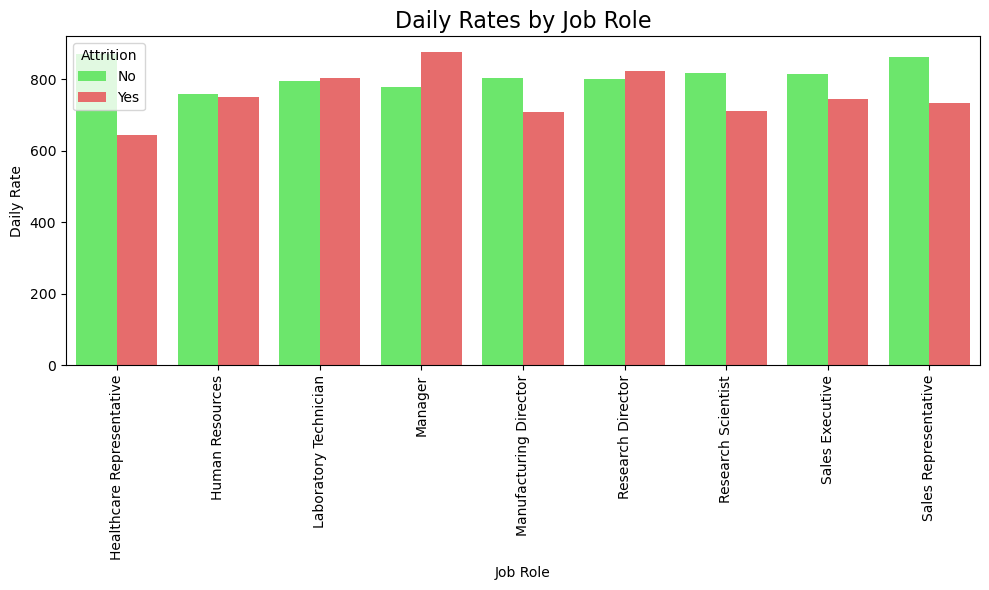

In [14]:
# Tính toán giá trị trung bình, nhỏ nhất và lớn nhất của DailyRate theo JobRole và Attrition
daily_rate_summary = (
    ibm_df.groupby(['Attrition', 'JobRole'])['DailyRate']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'avg_daily_rate', 'min': 'min_daily_rate', 'max': 'max_daily_rate'})
)

# Vẽ biểu đồ Daily Rates by Job Role
plt.figure(figsize=(10, 6))
sns.barplot(
    data=daily_rate_summary,
    x='JobRole',
    y='avg_daily_rate',
    hue='Attrition',
    palette=["#58FA58", "#FA5858"]
)

# Tùy chỉnh giao diện biểu đồ
plt.title("Daily Rates by Job Role", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Daily Rate")
plt.xlabel("Job Role")
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()

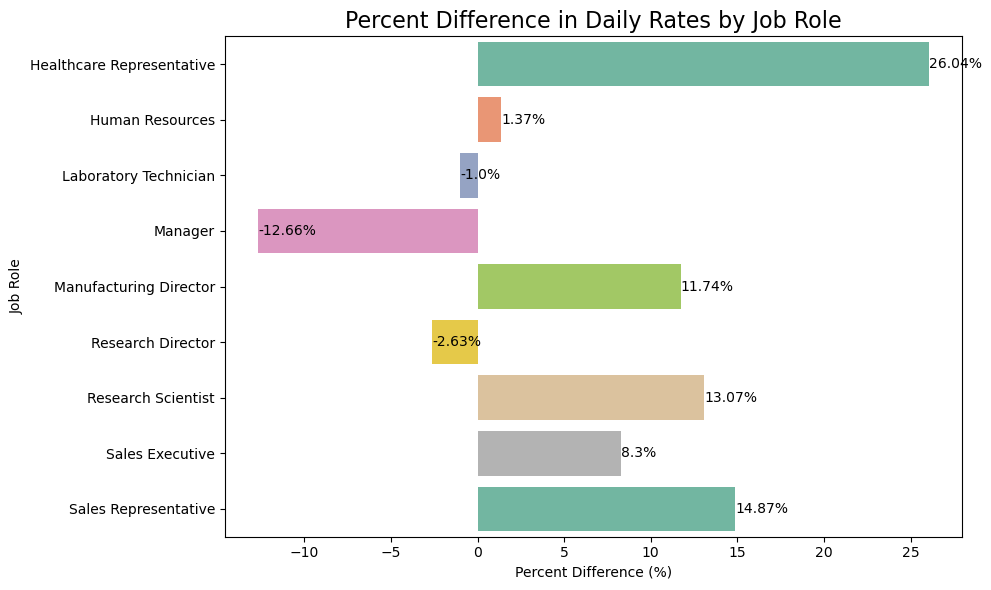

In [15]:
# Tính trung bình DailyRate cho nhóm Attrition = "Yes"
attrition_daily = (
    ibm_df[ibm_df['Attrition'] == "Yes"]
    .groupby('JobRole')['DailyRate']
    .mean()
    .reset_index()
    .rename(columns={'DailyRate': 'avg_attrition'})
)

# Tính trung bình DailyRate cho nhóm Attrition = "No"
noattrition_daily = (
    ibm_df[ibm_df['Attrition'] == "No"]
    .groupby('JobRole')['DailyRate']
    .mean()
    .reset_index()
    .rename(columns={'DailyRate': 'avg_noattrition'})
)

# Kết hợp hai bảng và tính phần trăm chênh lệch
combined_df = pd.merge(attrition_daily, noattrition_daily, on='JobRole')
combined_df['pct_diff'] = round(
    ((combined_df['avg_noattrition'] - combined_df['avg_attrition']) / combined_df['avg_noattrition']) * 100, 2
)

# Vẽ biểu đồ Percent Difference in Daily Rates by Job Role
plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined_df,
    x='pct_diff',
    y='JobRole',
    palette="Set2",
    orient='h'
)

# Hiển thị giá trị phần trăm chênh lệch trên cột
for index, row in combined_df.iterrows():
    plt.text(
        row['pct_diff'], 
        index, 
        f"{row['pct_diff']}%", 
        color="black", 
        va="center", 
        fontsize=10
    )

# Tùy chỉnh giao diện biểu đồ
plt.title("Percent Difference in Daily Rates by Job Role", fontsize=16)
plt.xlabel("Percent Difference (%)")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()

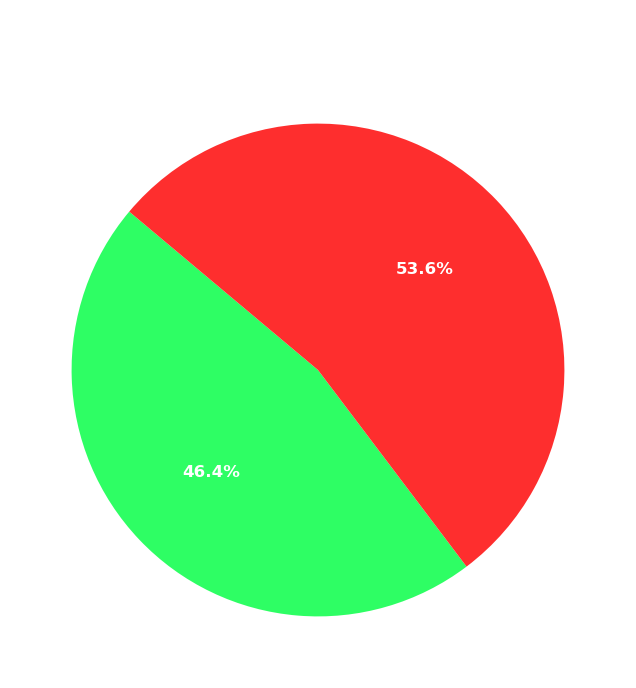

In [16]:
# Tính toán tỷ lệ phần trăm
overtime_data = (
    ibm_df[ibm_df['Attrition'] == "Yes"]
    .groupby('OverTime')['Attrition']
    .count()
    .reset_index(name='count')
)

overtime_data['percent'] = round((overtime_data['count'] / overtime_data['count'].sum()) * 100, 2)

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['#2EFE64', '#FE2E2E']
plt.pie(
    overtime_data['percent'], 
    labels=overtime_data['OverTime'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    textprops={'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
)
plt.title("Level of Attrition by Overtime Status\nIn Percent", color='white', fontsize=16)
plt.gca().set_facecolor('#0D7680')
plt.show()

## Câu hỏi: Môi trường làm việc ảnh hưởng như thế nào đến sự hài lòng và tỷ lệ nghỉ việc của nhân viên trong tổ chức?

### Mục đích của câu hỏi:
- Đánh giá các tác động của môi trường làm việc đến sự hài lòng và tỷ lệ nghỉ việc của nhân viên.
- Phân tích các yếu tố trong môi trường làm việc cần cải thiện để nâng cao hiệu quả công việc.

### Các bước phân tích:
- Trung bình thu nhập hàng tháng của từng vai trò công việc.
- Tỉ lệ nghỉ việc theo từng vai trò công việc.
- Tỉ lệ nghỉ việc theo mức độ hài lòng về các mối quan hệ tại nơi làm việc
- Mức độ hài lòng với môi trường làm việc theo từng vai trò công việc

### Code

#### Trung bình thu nhập hàng tháng của từng vai trò công việc  
##### Tiền xử lý  
Tính trung bình Thu nhập hàng tháng `MonthlyIncome` theo vai trò công việc `JobRole`

In [4]:
# Tính trung bình MonthlyIncome theo JobRole
job_sal = ibm_df.groupby('JobRole')['MonthlyIncome'].mean().reset_index()
job_sal = job_sal.sort_values(by='MonthlyIncome', ascending=False)
job_sal

,JobRole,MonthlyIncome
3,Manager,17181.676471
5,Research Director,16033.550000
0,Healthcare Representative,7528.763359
4,Manufacturing Director,7295.137931
7,Sales Executive,6924.279141
1,Human Resources,4235.750000
6,Research Scientist,3239.972603
2,Laboratory Technician,3237.169884
8,Sales Representative,2626.000000


##### Trực quan hóa
Sử dụng biểu đồ cột để hiển thị mức thu nhập trung bình theo từng vai trò công việc. Biểu đồ này giúp dễ dàng so sánh mức lương giữa các vai trò, từ đó xác định những vị trí công việc có mức lương cao nhất hoặc thấp nhất.

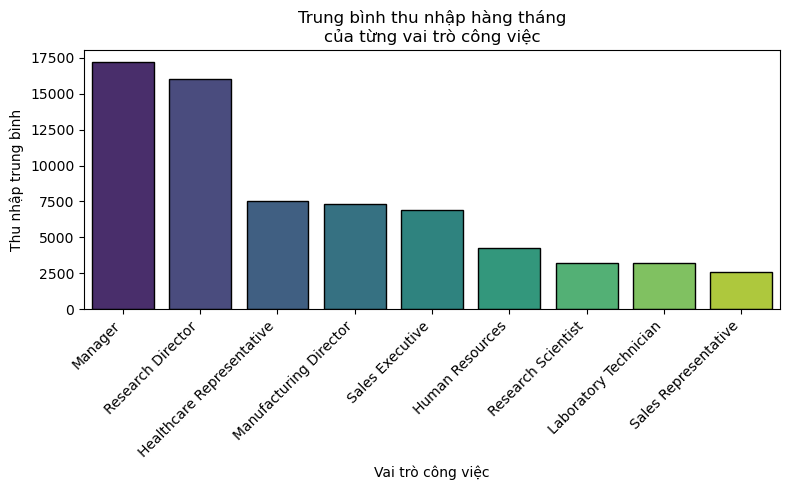

In [32]:
# Thiết lập biểu đồ
plt.figure(figsize=(8, 5))

# Vẽ biểu đồ cột
sns.barplot(x='JobRole', y='MonthlyIncome', data=job_sal, palette='viridis', edgecolor='black')

# Thêm tiêu đề và tên trục
plt.title("Trung bình thu nhập hàng tháng\ncủa từng vai trò công việc")
plt.xlabel("Vai trò công việc")
plt.ylabel("Thu nhập trung bình")
plt.xticks(rotation=45, ha="right")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#### Tỷ lệ nghỉ việc theo từng vai trò công việc  
##### Tiền xử lý  
- Tính tỷ lệ phần trăm nghỉ việc `Attrition` theo từng vai trò công việc `JobRole`
- Tách thành hai bảng dữ liệu con `yes_attr` và `no_attr` chuẩn bị cho việc vẽ biểu đồ để dễ dàng so sánh hai nhóm `Yes` và `No`

In [21]:
# Tính toán số lượng và tỷ lệ phần trăm theo JobRole và Attrition
attr_job = ibm_df.groupby(['JobRole', 'Attrition']).size().reset_index(name='amount')
attr_job['pct'] = attr_job.groupby('JobRole')['amount'].apply(lambda x: round((x / x.sum()) * 100, 2))

# Tách dữ liệu thành "Yes" và "No"
yes_attr = attr_job[attr_job['Attrition'] == "Yes"].sort_values('JobRole')
no_attr = attr_job[attr_job['Attrition'] == "No"].sort_values('JobRole')

# Chuẩn bị dữ liệu cho việc biểu đồ
labels = yes_attr['JobRole'].values
yes_pct = yes_attr['pct'].values
no_pct = no_attr['pct'].values

##### Trực quan hóa
Biểu đồ thanh ngang được sử dụng để thể hiện tỷ lệ nghỉ việc `Attrition` theo từng vai trò công việc `JobRole`. Biểu đồ này giúp so sánh trực tiếp giữa hai nhóm: nhân viên không nghỉ việc (No) và nhân viên đã nghỉ việc (Yes).

Phần trăm của nhóm không nghỉ việc được biểu diễn bên trái (với giá trị dương), trong khi phần trăm của nhóm nghỉ việc được biểu diễn bên phải (với giá trị âm, để dễ phân biệt). Trục trung tâm được đánh dấu bằng đường kẻ màu đen, giúp dễ dàng nhận ra sự cân đối hoặc chênh lệch giữa hai nhóm. Những nhãn giá trị phần trăm cũng được thêm trực tiếp lên biểu đồ, cung cấp thông tin chi tiết về mức độ chênh lệch.

Biểu đồ này không chỉ làm nổi bật vai trò công việc có tỷ lệ nghỉ việc cao mà còn hỗ trợ trong việc phân tích và định hướng các giải pháp nhằm giảm thiểu tỷ lệ nghỉ việc ở những vị trí nhạy cảm.

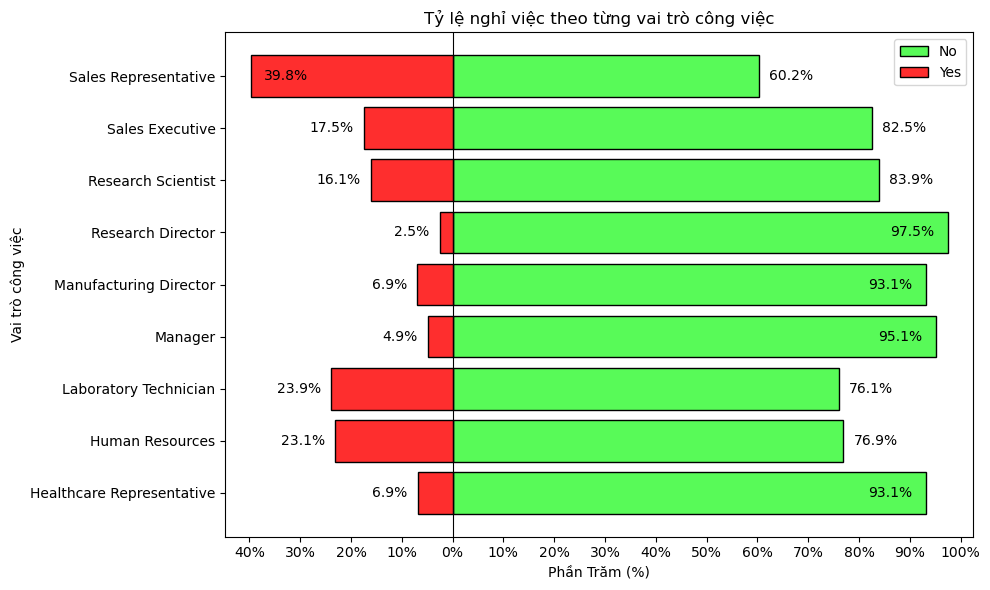

In [27]:
# Thiết lập biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Phần "No" bên phải
ax.barh(labels, no_pct, color='#58FA58', label='No', align='center', edgecolor='black')

# Phần "Yes" bên trái (đảo ngược giá trị âm để vẽ về bên trái)
ax.barh(labels, -yes_pct, color='#FE2E2E', label='Yes', align='center', edgecolor='black')

# Thêm tiêu đề và tên trục
ax.set_title("Tỷ lệ nghỉ việc theo từng vai trò công việc")
ax.set_xlabel("Phần Trăm (%)")
ax.set_ylabel("Vai trò công việc")
ax.set_xlim(-max(yes_pct) - 5, max(no_pct) + 5)
ax.set_xticks(np.arange(-40, 101, 10))
ax.set_xticklabels([f'{abs(x)}%' for x in np.arange(-40, 101, 10)])
ax.axvline(0, color='black', linewidth=0.8)

# Ghi nhãn giá trị phần trăm
for i, (yes, no) in enumerate(zip(yes_pct, no_pct)):
    if yes > 30:
        ax.text(-yes + 7, i, f"{yes:.1f}%", color="black", va="center", ha="center")
    else:
        ax.text(-yes - 2, i, f"{yes:.1f}%", color="black", va="center", ha="right")

    if no > 90:
        ax.text(no - 7, i, f"{no:.1f}%", color="black", va="center", ha="center")
    else:
        ax.text(no + 2, i, f"{no:.1f}%", color="black", va="center", ha="left")

# Hiển thị chú thích và biểu đồ
ax.legend(loc='upper right')
plt.tight_layout()
plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


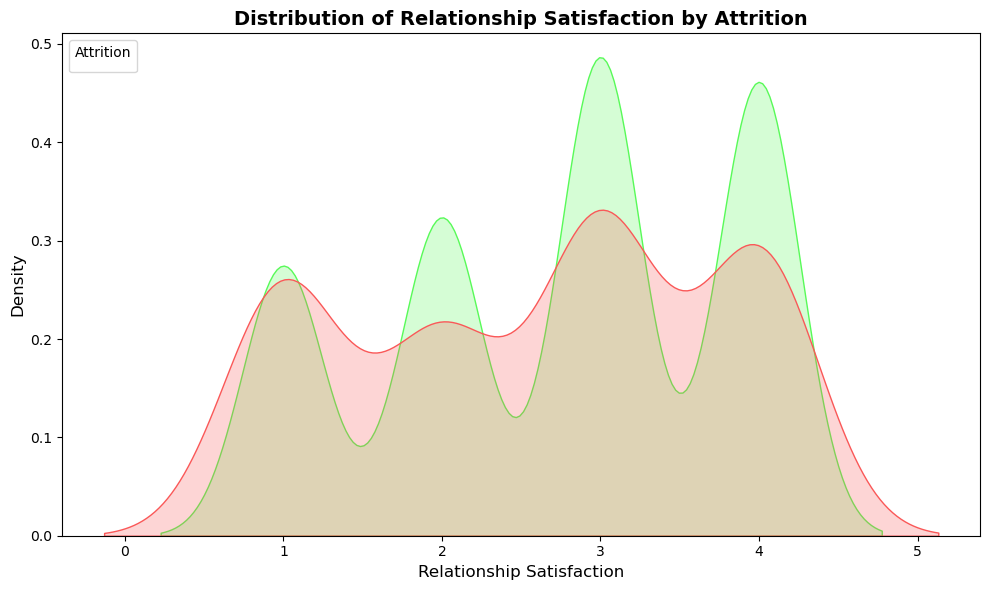

In [8]:
# Tạo phân phối Relationship Satisfaction theo Attrition
plt.figure(figsize=(10, 6))
rel_dist_plot = sns.kdeplot(
    data=ibm_df,
    x='RelationshipSatisfaction',
    hue='Attrition',
    fill=True,
    palette={"No": "#58FA58", "Yes": "#FA5858"},
    common_norm=False
)

# Tùy chỉnh giao diện
plt.title("Distribution of Relationship Satisfaction by Attrition", fontsize=14, weight='bold')
plt.xlabel("Relationship Satisfaction", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Attrition", loc="upper left")
plt.tight_layout()
plt.show()

#### Mức độ hài lòng với môi trường làm việc theo từng vai trò công việc

##### Tiền xử lý
Tính trung bình mức độ hài lòng với môi trường làm việc `EnvironmentSatisfaction` theo từng vai trò công việc `JobRole` và trạng thái nghỉ việc `Attrition`

In [28]:
# Tính trung bình EnvironmentSatisfaction theo JobRole và Attrition
env_attr = ibm_df.groupby(['JobRole', 'Attrition'])['EnvironmentSatisfaction'].mean().reset_index(name='avg_env')
env_attr

,JobRole,Attrition,avg_env
0,Healthcare Representative,No,2.819672
1,Healthcare Representative,Yes,2.111111
2,Human Resources,No,2.675000
3,Human Resources,Yes,2.333333
4,Laboratory Technician,No,2.822335
5,Laboratory Technician,Yes,2.387097
6,Manager,No,2.814433
7,Manager,Yes,1.800000
8,Manufacturing Director,No,2.940741
9,Manufacturing Director,Yes,2.600000


##### Trực quan hóa
Biểu đồ đường được sử dụng để thể hiện mức độ hài lòng với môi trường làm việc `EnvironmentSatisfaction` trung bình theo từng vai trò công việc `JobRole` và trạng thái nghỉ việc `Attrition`.

Mỗi vai trò công việc được biểu diễn bởi một điểm trên trục hoành, với giá trị hài lòng trung bình trên trục tung. Hai nhóm trạng thái (Yes - nghỉ việc, No - không nghỉ việc) được phân biệt bằng màu sắc: màu đỏ biểu thị nhóm nhân viên đã nghỉ việc và màu xanh lá biểu thị nhóm nhân viên vẫn còn làm việc.

Biểu đồ này giúp xác định sự khác biệt về mức độ hài lòng với môi trường giữa nhân viên nghỉ việc và nhân viên đang làm việc theo từng vai trò. Những khác biệt đáng kể có thể là dấu hiệu cho thấy môi trường làm việc có thể là yếu tố ảnh hưởng đến quyết định nghỉ việc của nhân viên ở một số vai trò cụ thể.

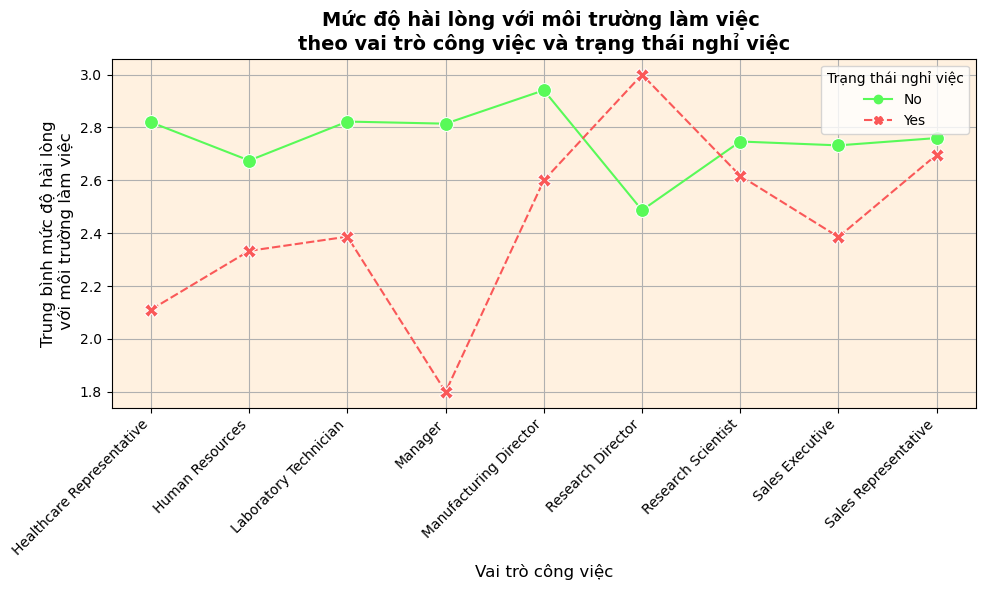

In [31]:
# Thiết lập biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ đường nối các điểm trung bình EnvironmentSatisfaction theo Attrition
sns.lineplot(
    data=env_attr,
    x='JobRole',
    y='avg_env',
    hue='Attrition',
    style='Attrition',
    markers=True,
    markersize=10,
    dashes=True,
    palette={"Yes": "#FA5858", "No": "#58FA58"}
)

# Thêm tiêu đề và tên trục
plt.title("Mức độ hài lòng với môi trường làm việc \ntheo vai trò công việc và trạng thái nghỉ việc", fontsize=14, weight='bold')
plt.xlabel("Vai trò công việc", fontsize=12)
plt.ylabel("Trung bình mức độ hài lòng\n với môi trường làm việc", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Hiển thị chú thích và biểu đồ
plt.gca().set_facecolor("#FFF1E0")
plt.legend(title="Trạng thái nghỉ việc")
plt.tight_layout()
plt.show()

### Kết luận:

Phân tích:
- Mức lương theo vai trò công việc: Quản lý (Managers) và Giám đốc nghiên cứu (Research Directors) có mức lương trung bình cao nhất.
- Tỷ lệ nghỉ việc theo vai trò công việc: Đại diện bán hàng (Sales Representatives), Quản lý nhân sự (Human Resources),  Kỹ thuật viên phòng thí nghiệm (Laboratory Technician) có tỷ lệ nghỉ việc cao nhất. Điều này cho thấy ở những bộ phận này có thể đang tồn tại một số vấn đề ảnh hưởng đến nhân viên.
- Môi trường làm việc: Như dự đoán, Quản lý và Đại diện chăm sóc sức khỏe đang làm việc trong môi trường có mức độ hài lòng thấp hơn. Tuy nhiên, điều đáng chú ý là Đại diện bán hàng không cho thấy sự bất mãn tương tự, có thể do phần lớn họ làm việc bên ngoài tổ chức.
Kết luận từ các biểu đồ:
Mức độ hài lòng với môi trường và tỷ lệ nghỉ việc:
Các vai trò như Quản lý và Đại diện chăm sóc sức khỏe có mức độ hài lòng với môi trường làm việc thấp và tỷ lệ nghỉ việc cao, cho thấy mối liên hệ rõ ràng giữa môi trường làm việc không tốt và quyết định nghỉ việc.

Sự khác biệt giữa các vai trò công việc:
Mặc dù Quản lý và Đại diện chăm sóc sức khỏe có môi trường làm việc kém, Đại diện bán hàng – dù có tỷ lệ nghỉ việc cao – lại không phản ánh sự bất mãn với môi trường làm việc, có thể do tính chất công việc không phụ thuộc nhiều vào điều kiện tại văn phòng.

Ảnh hưởng của các yếu tố môi trường:
Môi trường làm việc có tác động đáng kể đến sự hài lòng của nhân viên, đặc biệt đối với những vai trò gắn bó nhiều với văn phòng hoặc quản lý nhân viên khác. Việc cải thiện môi trường làm việc có thể giúp giảm tỷ lệ nghỉ việc, đặc biệt trong các vai trò như Quản lý và Đại diện chăm sóc sức khỏe.

Đề xuất:
Cần thực hiện khảo sát cụ thể để hiểu rõ nguyên nhân của sự bất mãn trong môi trường làm việc ở từng vai trò.
Đối với các vai trò như Quản lý và Đại diện chăm sóc sức khỏe, nên cân nhắc cải thiện điều kiện làm việc và cung cấp hỗ trợ tốt hơn để tăng mức độ hài lòng.
Với Đại diện bán hàng, các biện pháp khác như cải thiện chính sách thưởng và công nhận hiệu suất có thể hiệu quả hơn so với việc chỉ tập trung vào môi trường văn phòng.